## Libraries

First, we need to load a few libraries:

- [pandas](https://python-graph-gallery.com/pandas/): to handle the data
- [matplotlib](https://python-graph-gallery.com/matplotlib/): to draw the chart
- `circlify`: for computing the size and position of the circles


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import circlify

## 📍 Data

A basic [circle packing chart](https://python-graph-gallery.com/circular-packing) based on 1 level of hierarchy only requires a 2 columns data frame. The first column provides the name of each item (used for labeling). The second column provides a numeric value for the item. It controls the bubble size.


In [3]:
df = pd.DataFrame({
    'Name': ['A', 'B', 'C', 'D', 'E', 'F'],
    'Value': [10, 2, 23, 87, 12, 65]
})

You can type `df.head(3)` to observe the 3 first rows of this dataset in case you're not sure how it looks like 🧐 .


## 🖥️ Circle Packing algorithm


In a basic [circle packing chart](https://python-graph-gallery.com/circular-packing) with one level of hierarchy, each entity of the dataset is represented by a circle. The circle size is proportional to the item value it represents.

The hardest part of the job is to compute the position and size of each circle. Fortunately, the `circlify` library offers a `circlify()` function that does the computation. It requires as input:

- `data` : (necessary) A list of positive values sorted from largest to smallest
- `target_enclosure` : (optional) A target enclosure where the packed circles should fit (default to the unit circle (0, 0, 1))
- `show_enclosure` : (optional) A boolean indicating if the target enclosure should be appended to the output (default to False)

Let's compute circle positions for the dataset created above.


In [4]:
# compute circle positions
circles = circlify.circlify(
    df['Value'].tolist(),
    show_enclosure=False,
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

# reverse the order of the circles to match the order of data
circles = circles[::-1]

I strongly advise to use `print(circles)` to have a look to this newly created object. You will see that it provides `x`, `y` and `r` for each item of our dataset 🎉 .


## 📊 Basic chart


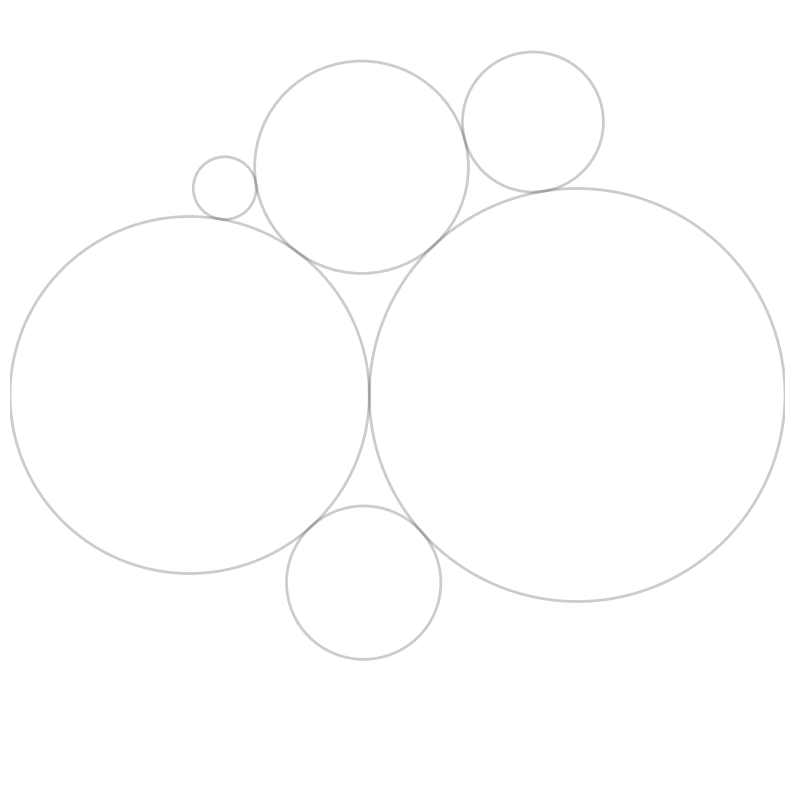

In [5]:
# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(10, 10))

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# print circles
for circle in circles:
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.2, linewidth=2, fill=False))

## 🎨 Visual tweaks


Let's make something pretty and more insightful from this. Let's add a title, color the bubbles and add labels:


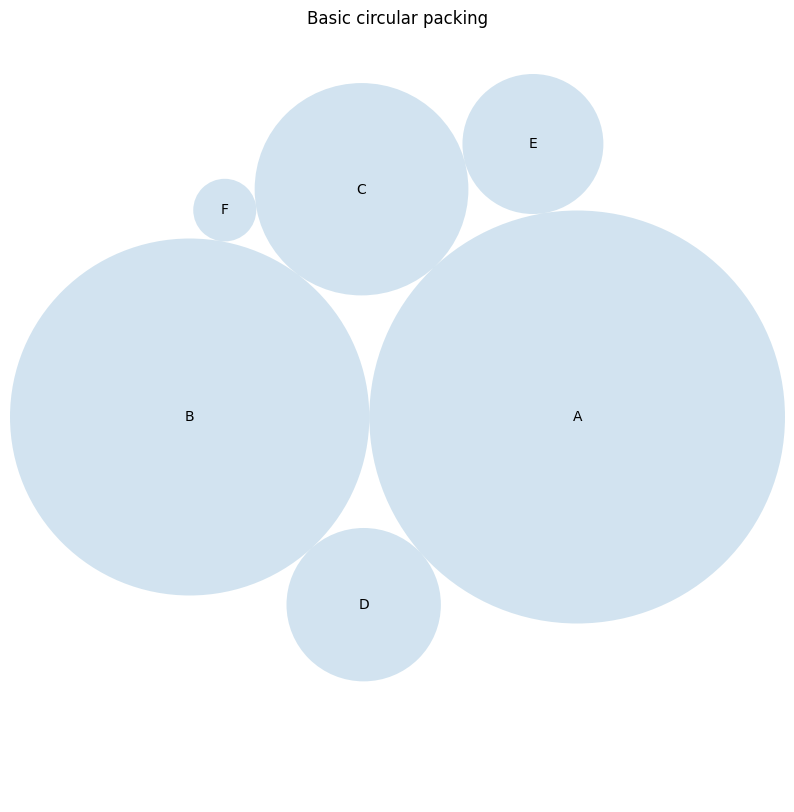

In [6]:
# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(10, 10))

# Title
ax.set_title('Basic circular packing')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = df['Name']

# print circles
for circle, label in zip(circles, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.2, linewidth=2))
    plt.annotate(
        label,
        (x, y),
        va='center',
        ha='center'
    )

> Note: the `circlize` library offers a `bubbles()` function that does all the drawing for you. But it does not provide a lot of customization, so I feel like `matplotlib` is a better option here.


## Space between bubbles


You can easily add spacing between bubbles. You just have to provide a percentage of the radius parameter of `add_patch()` (70% here).


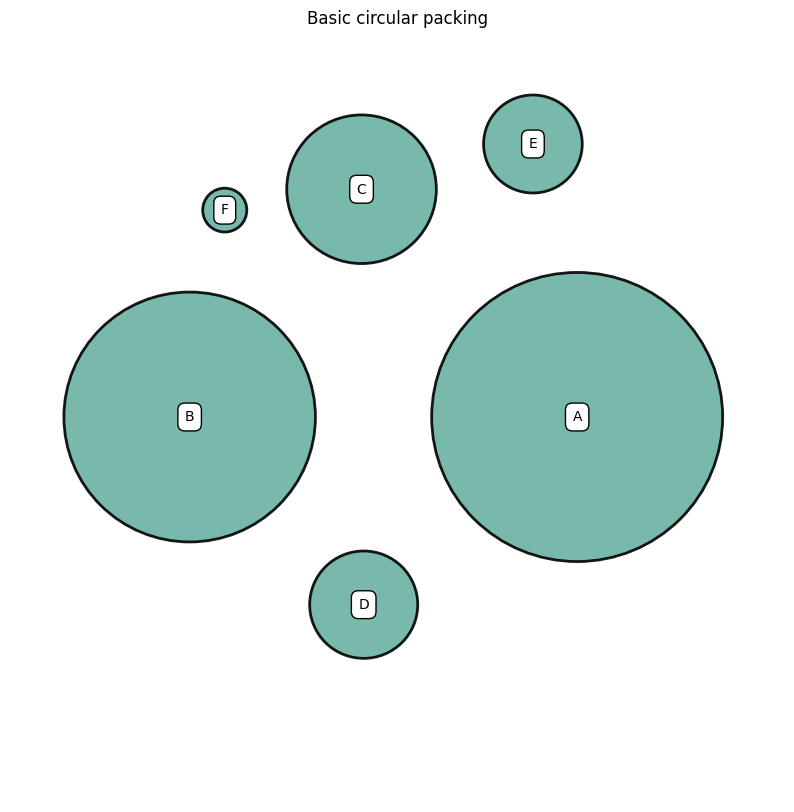

In [7]:
# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(10, 10))

# Title
ax.set_title('Basic circular packing')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = df['Name']

# print circles
for circle, label in zip(circles, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r*0.7, alpha=0.9, linewidth=2,
                 facecolor="#69b2a3", edgecolor="black"))
    plt.annotate(label, (x, y), va='center', ha='center', bbox=dict(
        facecolor='white', edgecolor='black', boxstyle='round', pad=.5))

## Going further

This post explains how to create a [circular packing chart](https://python-graph-gallery.com/circular-packing/) using [matplotlib](https://python-graph-gallery.com/matplotlib/) and the `circlify` package.

You might be interested in how to create a [circular packing with multiple hierarchy](https://python-graph-gallery.com/circular-packing-several-levels-of-hierarchy/) or creating a [treemap](https://python-graph-gallery.com/treemap/).
